In [1]:
import pandas as pd
pd.set_option('display.max_columns', 500)
import numpy as np
import os,sys
import tables
import pyarrow

import matplotlib.pyplot as plt
from matplotlib.transforms import offset_copy
from matplotlib.ticker import ScalarFormatter
from matplotlib.lines import Line2D
from scipy.optimize import curve_fit
from matplotlib.ticker import FormatStrFormatter
import matplotlib.font_manager as fm
from matplotlib import rcParams, get_data_path
import matplotlib.ticker as tck

# To find the coordinates in % within the canvas
def ATLAS(ylims,perc): 
    width=ylims[1]-ylims[0]
    return ylims[0]+width*perc

# Define best format
plt.style.use('classic')
rcParams['figure.facecolor'] = '1'
rcParams['legend.numpoints'] = 1
rcParams['patch.force_edgecolor'] = False
rcParams['legend.handletextpad'] = 0.3
rcParams["savefig.format"] = 'pdf'
fpath = os.path.join(get_data_path(), "/nfs/pic.es/user/s/salvador/arial.ttf")
fbipath = os.path.join(get_data_path(), "/nfs/pic.es/user/s/salvador/ArialBoldItalic.ttf")

In [2]:
user = "salvador"
pandasfilename = "pandas_tqXv9.feather"

In [3]:
#Pandas
!ls -l /data/at3/scratch/salvador/IFAE-tXq/NN/IFAE_NNTools/PandasWriter/$pandasfilename

-rw-r--r-- 1 salvador atlas 5315431026 Oct 12 19:44 /data/at3/scratch/salvador/IFAE-tXq/NN/IFAE_NNTools/PandasWriter/pandas_tqXv9.feather


In [4]:
#Get the pandas
!mkdir -p /tmp/$user
!cp /data/at3/scratch/salvador/IFAE-tXq/NN/IFAE_NNTools/PandasWriter/$pandasfilename /tmp/$user/
!ls -l /tmp/$user

total 5262776
-rw-r--r-- 1 salvador at3   73642298 Nov 24 14:11 pandas_tqXtruth_v2.feather
-rw-r--r-- 1 salvador at3 5315431026 Nov 24 15:49 pandas_tqXv9.feather


In [5]:
#Inspect the pandas
df = pd.read_feather("/tmp/"+user+"/"+pandasfilename)
#Removing bad events for 160 GeV
df = df[~((df.X_mass==160)&(df.nomWeight_weight_mc > 700))]

#Multiplying by the luminosity
df["weight"]*=139000.0

print("Number of entries:",df.shape[0],"\nNumber of columns",df.shape[1])
print(df.columns.unique())

        
nraw = df.process.value_counts()
print(nraw)
print("Total     events ",len(df.index))   #number of rows

#Removing weight=0 events
df = df[(df.weight != 0)]
print("Total weight!= 0 ",len(df.index))   #number of rows



print("Total background ",df[df["X_mass"]==-1].count()["index"])
print("Total     signal ",df[df["X_mass"]!=-1].count()["index"])

Number of entries: 7744533 
Number of columns 108
Index(['index', 'DRb1b2', 'DRb1b3', 'DRb2b3', 'NNrecoXv12_q_100',
       'NNrecoXv12_q_120', 'NNrecoXv12_q_140', 'NNrecoXv12_q_150',
       'NNrecoXv12_q_160', 'NNrecoXv12_q_30',
       ...
       'met_phi', 'nomWeight_weight_btag', 'nomWeight_weight_jvt',
       'nomWeight_weight_leptonSF', 'nomWeight_weight_mc',
       'nomWeight_weight_norm', 'nomWeight_weight_pu', 'process', 'region',
       'weight'],
      dtype='object', length=108)
ttb           5452598
ttH            908613
ttc            556624
ttbarlight     221330
topEW          140568
               ...   
cX_20             933
cbarX_20          929
uX_20             700
ubarX_20          681
tH                434
Name: process, Length: 65, dtype: int64
Total     events  7744533
Total weight!= 0  7718922
Total background  7460882
Total     signal  258040


## Reframing

In [6]:
#reframe angles using lepton as reference to remove symmetries of the event
reframelep_phi=1
reframelep_eta=1

if reframelep_phi:
    for i in range(0,6):
        df["jet"+str(i)+"_phi_bord"]=df["jet"+str(i)+"_phi_bord"]-df["lep1_phi"]
        df.loc[(df["jet"+str(i)+"_phi_bord"]>np.pi),"jet"+str(i)+"_phi_bord"] -= 2*np.pi
        df.loc[(df["jet"+str(i)+"_phi_bord"]< -np.pi),"jet"+str(i)+"_phi_bord"] += 2*np.pi

    df["met_phi"]=df["met_phi"]-df["lep1_phi"]
    df.loc[(df["met_phi"]>np.pi),"met_phi"] -= 2*np.pi
    df.loc[(df["met_phi"]< -np.pi),"met_phi"] += 2*np.pi


if reframelep_eta:
    for i in range(0,6):
        df.loc[(df.lep1_eta<0),"jet"+str(i)+"_eta_bord"] *= -1
    df.loc[(df.lep1_eta<0),"lep1_eta"] *= -1

## Plots for the internal

In [7]:
#tuple with different paremeters of the plot
plotinfo=[ #variable, bins, minx, maxx, xlabel title. -- if GeV in title, magnitude is divided by 1000
 ['DRb1b2', 30, 0.0, 5.0, r"$\Delta$R(b1,b2)"],
 ['mb1b2', 30, 0.0, 200.0, 'm(b1,b2) [GeV]'],
 ['mb2b3', 30, 0.0, 200.0, 'm(b2,b3) [GeV]'],
 ['mb1b3', 30, 0.0, 200.0, 'm(b1,b3) [GeV]'],
]

Working with region  c1l4jex3bex
Total  1351304
4j3b
Total bkg  1214312
imass  0 Nlines  4 imass%Nlines  0
Creating new figure  0
Working with mass  30
Signal  q 30  :  4347
['uX_30' 'ubarX_30' 'cX_30' 'cbarX_30']
imass  1 Nlines  4 imass%Nlines  1
Working with mass  60
Signal  q 60  :  7429
['uX_60' 'ubarX_60' 'cX_60' 'cbarX_60']
imass  2 Nlines  4 imass%Nlines  2
Working with mass  90
Signal  q 90  :  9222
['uX_90' 'ubarX_90' 'cX_90' 'cbarX_90']
imass  3 Nlines  4 imass%Nlines  3
Working with mass  150
Signal  q 150  :  12356
['uX_150' 'ubarX_150' 'cX_150' 'cbarX_150']
Defining axises
./Plots/test/tqX_4j3b_DRb1b2_v1.png


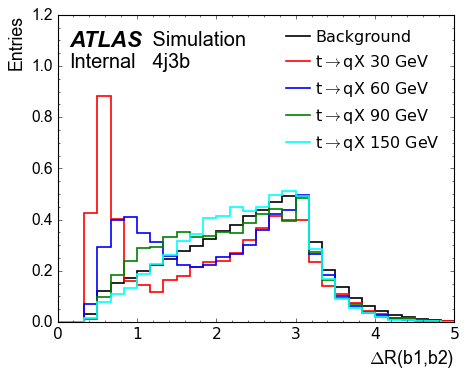

imass  0 Nlines  4 imass%Nlines  0
Creating new figure  0
Working with mass  30
Signal  q 30  :  4347
['uX_30' 'ubarX_30' 'cX_30' 'cbarX_30']
imass  1 Nlines  4 imass%Nlines  1
Working with mass  60
Signal  q 60  :  7429
['uX_60' 'ubarX_60' 'cX_60' 'cbarX_60']
imass  2 Nlines  4 imass%Nlines  2
Working with mass  90
Signal  q 90  :  9222
['uX_90' 'ubarX_90' 'cX_90' 'cbarX_90']
imass  3 Nlines  4 imass%Nlines  3
Working with mass  150
Signal  q 150  :  12356
['uX_150' 'ubarX_150' 'cX_150' 'cbarX_150']
Defining axises
./Plots/test/tqX_4j3b_mb1b2_v1.png


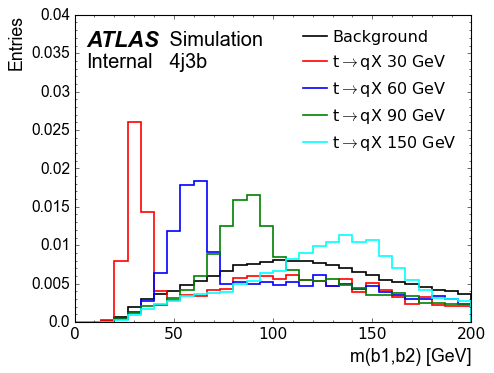

imass  0 Nlines  4 imass%Nlines  0
Creating new figure  0
Working with mass  30
Signal  q 30  :  4347
['uX_30' 'ubarX_30' 'cX_30' 'cbarX_30']
imass  1 Nlines  4 imass%Nlines  1
Working with mass  60
Signal  q 60  :  7429
['uX_60' 'ubarX_60' 'cX_60' 'cbarX_60']
imass  2 Nlines  4 imass%Nlines  2
Working with mass  90
Signal  q 90  :  9222
['uX_90' 'ubarX_90' 'cX_90' 'cbarX_90']
imass  3 Nlines  4 imass%Nlines  3
Working with mass  150
Signal  q 150  :  12356
['uX_150' 'ubarX_150' 'cX_150' 'cbarX_150']
Defining axises
./Plots/test/tqX_4j3b_mb2b3_v1.png


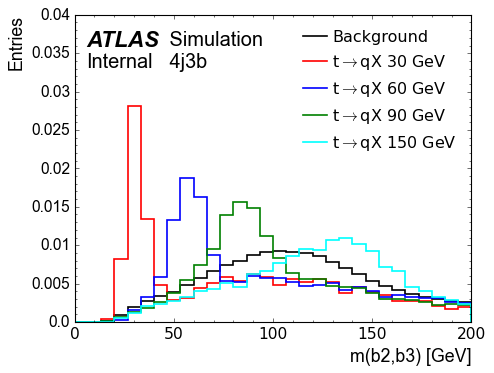

imass  0 Nlines  4 imass%Nlines  0
Creating new figure  0
Working with mass  30
Signal  q 30  :  4347
['uX_30' 'ubarX_30' 'cX_30' 'cbarX_30']
imass  1 Nlines  4 imass%Nlines  1
Working with mass  60
Signal  q 60  :  7429
['uX_60' 'ubarX_60' 'cX_60' 'cbarX_60']
imass  2 Nlines  4 imass%Nlines  2
Working with mass  90
Signal  q 90  :  9222
['uX_90' 'ubarX_90' 'cX_90' 'cbarX_90']
imass  3 Nlines  4 imass%Nlines  3
Working with mass  150
Signal  q 150  :  12356
['uX_150' 'ubarX_150' 'cX_150' 'cbarX_150']
Defining axises
./Plots/test/tqX_4j3b_mb1b3_v1.png


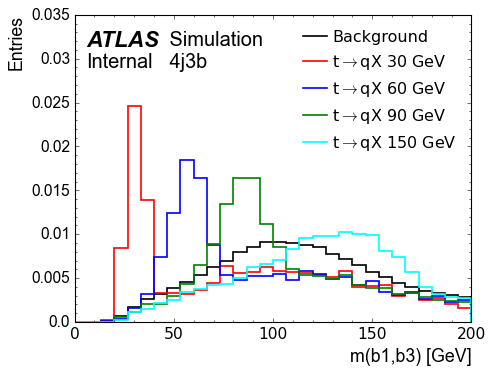

In [8]:
iDebug=0

Xmass = [30,60,90,150] # [20,30,40,50,60,70,80,90,100,120,140,150,160]
Regions = ["c1l4jex3bex"] # ['c1l4jex3bex','c1l4jex4bin','c1l5jex3bex','c1l5jex4bin','c1l6jex3bex','c1l6jex4bin','c1l7jin3bex','c1l7jin4bin']
Channels = ["q"] #["q","c","u"]

labels = {"c1l4jex3bex":"4j3b" , "c1l5jex3bex":"5j3b" , "c1l6jex3bex":"6j3b", "c1l4jex4bin": "4j4b", "c1l5jex4bin": r'5j$\geq$4b', "c1l6jex4bin": r'6j$\geq$4b' }

#Creation of lists
feature_names = []; Nbins = []; var_min = []; var_max =[]; titleX =[]; position = []
for row in plotinfo:
    feature_names += [row[0]]  #Access the first component of all rows in tuple
    Nbins += [row[1]]
    var_min += [row[2]]
    var_max += [row[3]]
    titleX += [row[4]]
    position += ['upper right']
    if iDebug:
        print("%20s   %10d   %12.3f   %12.3f   %20s"
                      %(row[0],row[1],row[2],row[3],row[4]))
if iDebug:
    print("Number of plots ",len(plotinfo),feature_names,position)


#Loop over channels
for channel in Channels:

    #Loop over regions
    for region in Regions:
        print("Working with region ",region)
        df2 = df[df.region==region]
        print("Total ", len(df2.index))
    
        print(labels[region])
        # For background
        df_Bkg = df2[(df2.X_mass == -1) & (df2.process != "data")]
        print("Total bkg ",len(df_Bkg))
    
        Col=["red","blue","green","cyan","orange","purple","yellow"]

        #Plot of all features 
        ifeature=0
        #Lines per plot
        NLines=4
        for feature in feature_names:
            #plt.subplot(nRows,nCols,position)
            if iDebug: print(feature)
    
            # Loop over masses
            icol=0; i=0; imass=0; iplot=0
            for mass in Xmass:        
                icol+=1

                # This is in order to have 4 lines in the last plot
                if mass==1546354630:
                    imass-=1

                print("imass ",imass, "Nlines ", NLines, "imass%Nlines ", imass%NLines)

                # Include NLines of signal per plot
                if not imass%NLines:
                    # Creating figure with axis
                    plt.figure(figsize=(6.4,4.8),linewidth=0)
                    #plt.axhline(y=0.,c="k",lw=2,ls="--")
                    print("Creating new figure ",imass)
                    icol=0
                
                    #Plot for background first
                    plt.hist(df_Bkg[feature],alpha=1,color='black',bins=Nbins[ifeature],density=True,
                            range=[var_min[ifeature],var_max[ifeature]],label="Background",
                            weights=df_Bkg.weight,histtype='step',zorder=1,linewidth=1.5)
  
                print("Working with mass ",mass)
 
                # For signal
                df_Signal_tmp = df2[df2.X_mass == mass]
                if channel!="q":
                    df_Signal = df_Signal_tmp[df_Signal_tmp.process.str.contains(channel)]
                else:
                    df_Signal = df_Signal_tmp
                print("Signal ",channel, mass, " : ",len(df_Signal.index))
                print(df_Signal.process.unique())
        
                plt.hist(df_Signal[feature],alpha=1,color=Col[icol],bins=Nbins[ifeature],density=True,
                         range=[var_min[ifeature],var_max[ifeature]],label=r't$\rightarrow$'+channel+"X "+str(mass)+" GeV",
                         weights=df_Signal.weight,histtype='step',linewidth=1.5)

                if imass!=0 and not (imass+1)%NLines:
                    print("Defining axises")
                    iplot+=1
            
                    plt.xlabel(titleX[ifeature],horizontalalignment='right',x=1,
                               fontproperties=fm.FontProperties(fname=fpath,size=16))
                    plt.ylabel("Entries",horizontalalignment='right',y=1,
                               fontproperties=fm.FontProperties(fname=fpath,size=16))

                    plt.grid(False) #no grid lines in the plot
                    plt.xticks(fontsize=14)  #14
                    plt.yticks(fontsize=14) #14
                    ax = plt.gca()   # get current axis
                    #ax.yaxis.set_major_formatter(FormatStrFormatter('%.0e')) #%4.2f
                    handles,mylabels = ax.get_legend_handles_labels()
                    new_handles = [Line2D([], [], color=h.get_edgecolor(),linestyle=h.get_linestyle(),linewidth=h.get_linewidth()) for h in handles]
                    plt.legend(handles=new_handles,labels=mylabels,loc="best",frameon=False, handlelength=1.5)
                    
                    plt.ylim(0.,plt.gca().get_ylim()[1]*1.25)
                    plt.xlim(var_min[ifeature],var_max[ifeature])
                    #plt.gca().set_xticklabels([round(num,1) for num in ax.get_xticks()], fontproperties=fm.FontProperties(fname=fpath,size=14))
                    ax.xaxis.set_ticks(ax.get_xticks()) #to avoid warnings
                    ax.yaxis.set_ticks(ax.get_yticks()) #to avoid warnings
                    plt.gca().set_yticklabels([round(num,3) for num in ax.get_yticks()], 
                                          fontproperties=fm.FontProperties(fname=fpath,size=14))
                    plt.gca().yaxis.set_minor_locator(tck.AutoMinorLocator())
                    plt.gca().xaxis.set_minor_locator(tck.AutoMinorLocator())

                    # To put ticks at the top and right axis
                    #plt.gca().tick_params(length=10, width=0.5)
                    #plt.gca().tick_params(which="minor",length=5, width=0.5)
                    plt.text(ATLAS(plt.gca().get_xlim(),0.03),ATLAS(plt.gca().get_ylim(),0.95),
                             "ATLAS",va='top',ha='left',fontproperties=fm.FontProperties(fname=fbipath,size=20))
                    plt.text(ATLAS(plt.gca().get_xlim(),0.03),ATLAS(plt.gca().get_ylim(),0.95),
                             "               Simulation\nInternal",va='top',ha='left',
                             fontproperties=fm.FontProperties(fname=fpath,size=18))
                    plt.text(ATLAS(plt.gca().get_xlim(),0.03),ATLAS(plt.gca().get_ylim(),0.95),
                             "\n               "+labels[region],va='top',ha='left',
                             fontproperties=fm.FontProperties(fname=fpath,size=18))
                    savestring = "./Plots/t"+channel+"X_"+labels[region]+"_"+feature+"_v"+str(iplot)
                    plt.savefig(savestring+".png",bbox_inches='tight',dpi=200)
                    plt.savefig(savestring+".pdf",bbox_inches='tight')
                    print(savestring)
                imass+=1

            ifeature+=1
            plt.show()